## Dataset

### Escolha do dataset para um aprendizado não supervisionado foi o Obesity or CVD risk, disponivel no kaggle pelo link: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster


In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings('ignore')


In [77]:
df = pd.read_csv('data\ObesityDataSet.csv')

In [78]:
# Normalização de colunas numéricas
numeric_cols = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Codificação de colunas categóricas
categorical_cols = [
    "Gender", "family_history_with_overweight", "FAVC", "CAEC", 
    "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"
]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [79]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,2,0,-0.013073,0,-1.188039,0.561997,3,3,1
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,2,1,1.618759,1,2.339750,-1.080625,2,3,1
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,2,0,-0.013073,0,1.163820,0.561997,1,3,1
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,2,0,-0.013073,0,1.163820,-1.080625,1,4,5
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,2,0,-0.013073,0,-1.188039,-1.080625,2,3,6


In [80]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int32  
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int32  
 9   SMOKE                           2111 non-null   int32  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int32  
 12  FAF                             21

## DICIONARIO PÓS NORMALIZACAO DAS COLUANS:
#### Gender: {'Female': 0, 'Male': 1}
### Family_history_with_overweight: {'no': 0, 'yes': 1}
### FAVC: {'no': 0, 'yes': 1}
### CAEC: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
### SMOKE: {'no': 0, 'yes': 1}
### SCC: {'no': 0, 'yes': 1}
### CALC: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
### MTRANS: {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}
### NObeyesdad: {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}

## O QUE CADA INFORMAÇÃO REPRESENTA: 

### Os atributos relacionados aos hábitos alimentares são: Consumo frequente de alimentos altamente calóricos (FAVC), Frequência de consumo de vegetais (FCVC), Número de refeições principais (NCP), Consumo de alimentos entre as refeições (CAEC), Consumo de água diariamente (CH20) e Consumo de álcool (CALC). Os atributos relacionados à condição física são: Monitoramento do consumo de calorias (SCC), Frequência de atividade física (FAF), Tempo de uso de dispositivos de tecnologia (TUE), Transporte utilizado (MTRANS)

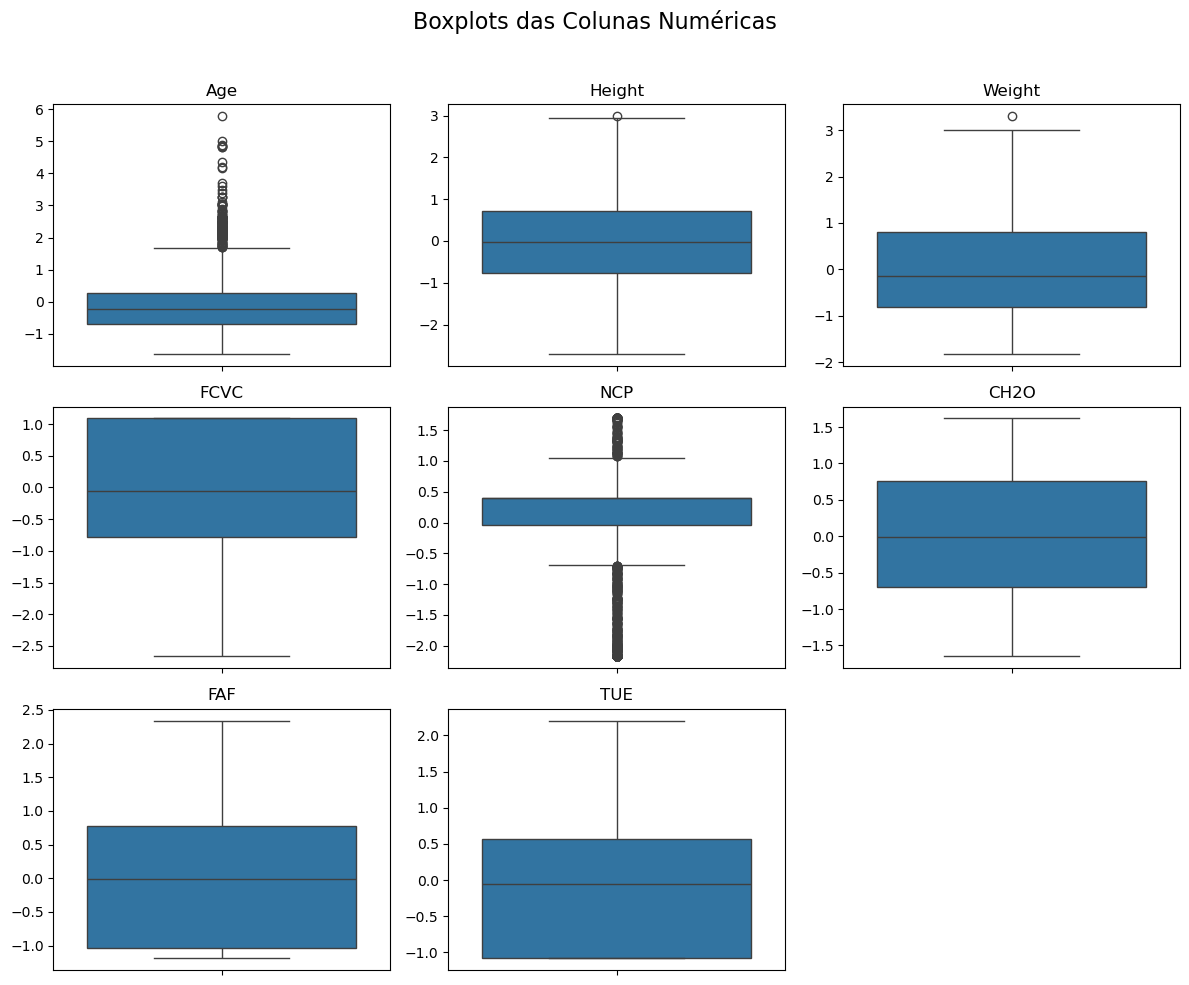

In [82]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle('Boxplots das Colunas Numéricas', fontsize=16)

for i, col in enumerate(numeric_cols):
    sns.boxplot(ax=axes[i // 3, i % 3], data=df, y=col)
    axes[i // 3, i % 3].set_title(f'{col}', fontsize=12)
    axes[i // 3, i % 3].set_ylabel('')

if len(numeric_cols) < 9:
    for i in range(len(numeric_cols), 9):
        axes[i // 3, i % 3].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



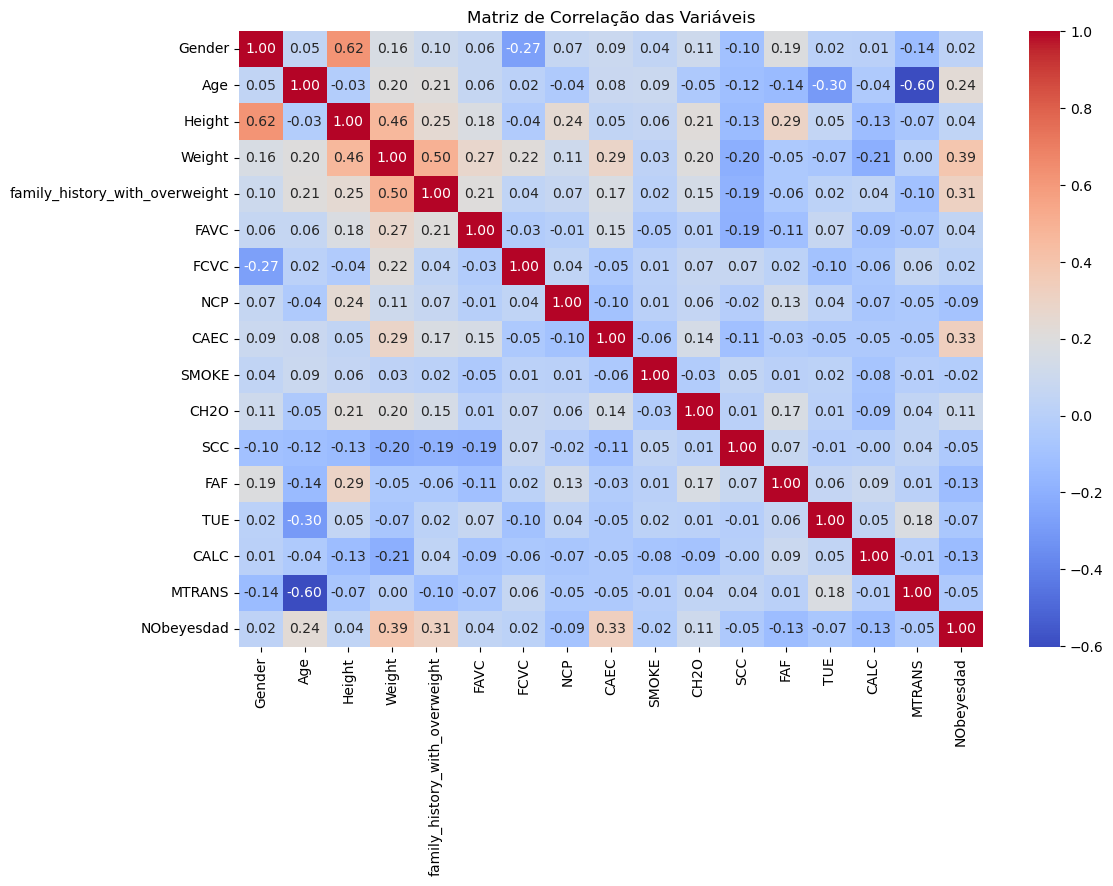

In [83]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação das Variáveis')
plt.show()

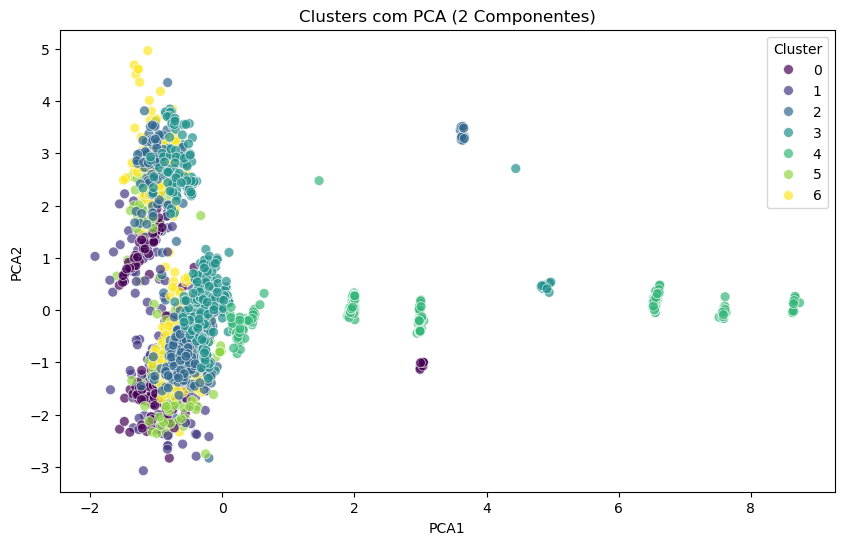

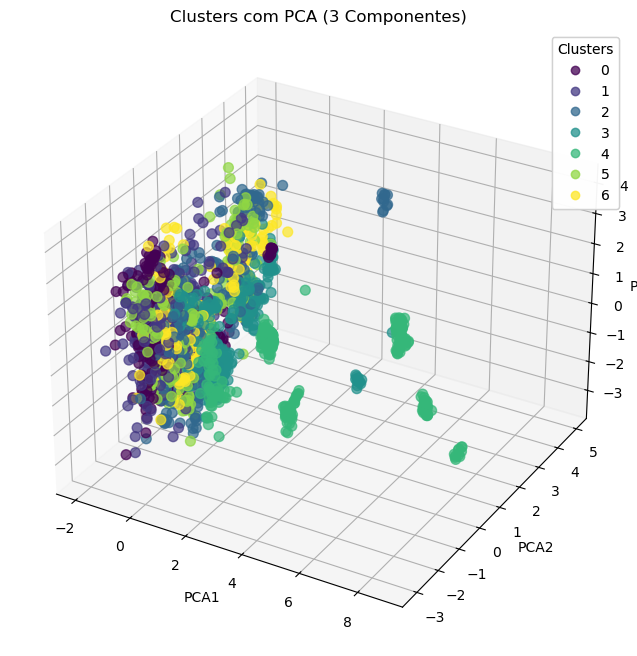

In [74]:
# PCA
pca = PCA(n_components=2)
df_pca_2d = pca.fit_transform(df.drop('NObeyesdad', axis=1))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca_2d[:, 0], y=df_pca_2d[:, 1], hue=df['NObeyesdad'], palette='viridis', s=50, alpha=0.7)
plt.title('Clusters com PCA (2 Componentes)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df.drop('NObeyesdad', axis=1))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca_3d[:, 0], df_pca_3d[:, 1], df_pca_3d[:, 2], 
                     c=df['NObeyesdad'], cmap='viridis', s=50, alpha=0.7)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title('Clusters com PCA (3 Componentes)')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()


In [84]:
# Cluster
features = df[numeric_cols]
dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters = dbscan.fit_predict(features)

df['Cluster'] = clusters

clusters_unicos = set(clusters)
print(f"Clusters identificados: {clusters_unicos}")
print(f"Número de clusters: {len(clusters_unicos) - (1 if -1 in clusters_unicos else 0)}")

# Silhueta Score 
score = silhouette_score(features[clusters != -1], clusters[clusters != -1])
print(f"Silhueta: {score}")
   



Clusters identificados: {0, 1, 2, 3, 4, 5, 6, 7, 8, -1}
Número de clusters: 9
Silhueta: 0.6871019202873015


#### Com base no conjunto de dados analisado, o objetivo foi explorar as características de indivíduos relacionadas à obesidade e aplicar técnicas de clustering para identificar padrões entre os dados. Durante o processo, utilizamos o algoritmo DBSCAN para agrupar os dados, além de técnicas como Análise de Componentes Principais (PCA) para visualização e redução da dimensionalidade. 

#### Foram identificados 9 clusters válidos (incluindo um cluster de outliers representado por -1), com um Silhouette Score de 0.687, indicando uma boa separação entre os grupos.
#### A análise de outliers revelou 167 instâncias atípicas, destacando a presença de dados que não se enquadram bem nos clusters principais. Esses outliers podem representar padrões raros ou inconsistências no conjunto de dados.